In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load The Dataset

In [4]:
# Imported the data from kaggle dataset

data = pd.read_csv("customer_segmentation_data.csv")
data

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


## Structure of Data

In [6]:
# Shape of Data

print(f"Shape of the data is : {data.shape}")

Shape of the data is : (53503, 20)


In [7]:
# Checking the data types 

data.dtypes

Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Education Level                       object
Geographic Information                object
Occupation                            object
Income Level                           int64
Behavioral Data                       object
Purchase History                      object
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Segmentation Group                    object
dtype: object

In [8]:
# Summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [9]:
# Statistical Summary of Non-Categorical columns 

data.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [10]:
# Statistical Summary of Categorical Columns

data.describe(include = object)

,Gender,Marital Status,Education Level,Geographic Information,Occupation,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
count,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503
unique,2,5,5,35,9,5,2016,5,5,4,5,5,5,5,5
top,Male,Married,Associate Degree,Lakshadweep,Salesperson,policy3,03-12-2018,Chat,policy1,Group,Mail,In-Person Meeting,Weekends,German,Segment5
freq,27499,13219,12213,2140,7919,15761,173,14153,13365,18255,11887,14311,14092,14452,13976


## Data Cleaning

In [12]:
# Checking The Null Values In Dataset

data.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [13]:
# Cheching The Duplicate Values

data.duplicated().sum()

0

In [14]:
# Covert the data type of 'Purchase History' to datetime format

data["Purchase History"] = pd.to_datetime(data["Purchase History"],format = "mixed",dayfirst = False)
data.dtypes

Customer ID                                    int64
Age                                            int64
Gender                                        object
Marital Status                                object
Education Level                               object
Geographic Information                        object
Occupation                                    object
Income Level                                   int64
Behavioral Data                               object
Purchase History                      datetime64[ns]
Interactions with Customer Service            object
Insurance Products Owned                      object
Coverage Amount                                int64
Premium Amount                                 int64
Policy Type                                   object
Customer Preferences                          object
Preferred Communication Channel               object
Preferred Contact Time                        object
Preferred Language                            

In [15]:
# Drop the ID Column ; no need

data.drop("Customer ID",axis = 1, inplace = True)
data.head()

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


## Exploratory Data Analysis (EDA)
#### Basic Data Extraction Using (sqlite3) SQL 

In [17]:
# Connect to SQLite3 and extract data using SQL queries
df_sql = data

# Create SQLite database in memory ; (or file: 'xyz.db')
conn = sqlite3.connect(":memory:")

# Write dataframe to SQL table
df_sql.to_sql("customers", conn, index=False, if_exists="replace")


53503

In [18]:
# Extrect Data For Gender Count

query = """
SELECT Gender,COUNT(Gender) as Total_Count
FROM customers
GROUP BY Gender
"""
gender_count = pd.read_sql(query, conn)
gender_count

,Gender,Total_Count
0,Female,26004
1,Male,27499


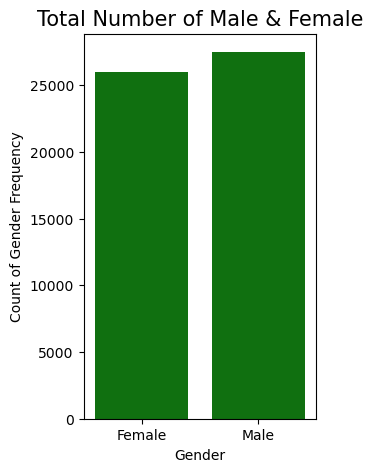

In [19]:
# Plot The Barplot For Gender Among Segmentation

plt.figure(figsize = (3,5))
sns.barplot(x = gender_count["Gender"], y = gender_count["Total_Count"], color = "green")
plt.title("Total Number of Male & Female", fontsize = 15)
plt.xlabel("Gender")
plt.ylabel("Count of Gender Frequency")
plt.show()

In [20]:
# Extrect Data For Education Level

query = """
SELECT [Education Level], COUNT([Education Level]) as Total_Count
FROM customers
GROUP BY [Education Level]
"""

edu_count = pd.read_sql(query,conn)
edu_count

,Education Level,Total_Count
0,Associate Degree,12213
1,Bachelor's Degree,9214
2,Doctorate,12103
3,High School Diploma,10607
4,Master's Degree,9366


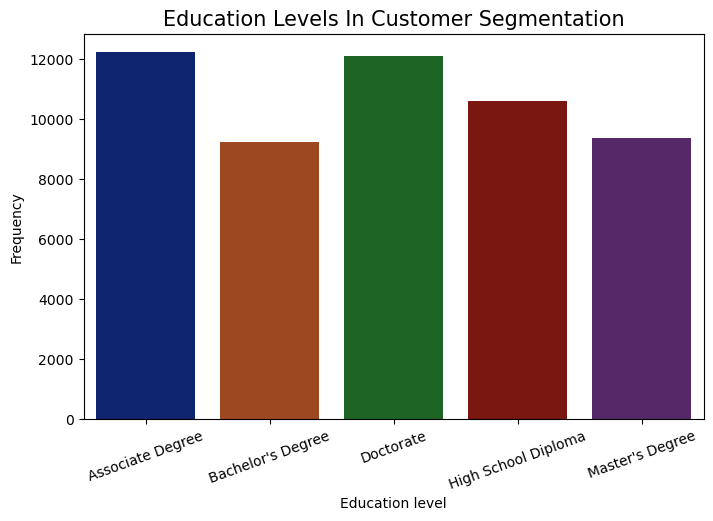

In [21]:
# Plot The Barplot For Education Levels Among Segmentation

plt.figure(figsize = (8,5))
sns.barplot(x = edu_count["Education Level"], y = edu_count["Total_Count"], 
            palette = "dark")
plt.title("Education Levels In Customer Segmentation", fontsize = 15)
plt.xlabel("Education level")
plt.xticks(rotation = 20) 
plt.ylabel("Frequency")
plt.show()

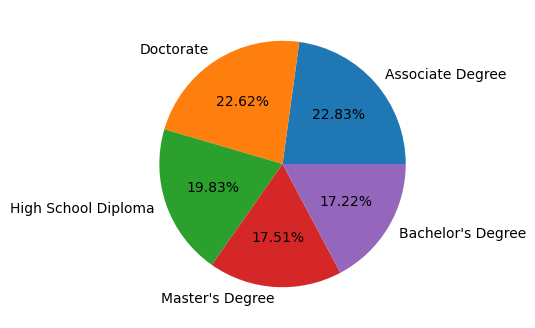

In [22]:
# Identify Education Level and Their Precentages

edu_level = data["Education Level"].value_counts().index
edu_value = data["Education Level"].value_counts().values

plt.figure(figsize = (4,4))
plt.pie(edu_value,labels = edu_level,autopct = "%1.2f%%")
plt.show()

In [23]:
# Extracting Geographical Information For Customer Segmentation

query = """
SELECT [Geographic Information], COUNT([Geographic Information]) as Total_Count
FROM customers
GROUP BY [Geographic Information]
"""

geo_count = pd.read_sql(query,conn)
geo_count

,Geographic Information,Total_Count
0,Andaman and Nicobar Islands,1678
1,Andhra Pradesh,1431
2,Arunachal Pradesh,1903
3,Assam,1460
4,Bihar,1962
5,Chandigarh,1376
6,Chhattisgarh,1451
7,Dadra and Nagar Haveli,1403
8,Daman and Diu,1512
9,Delhi,1756


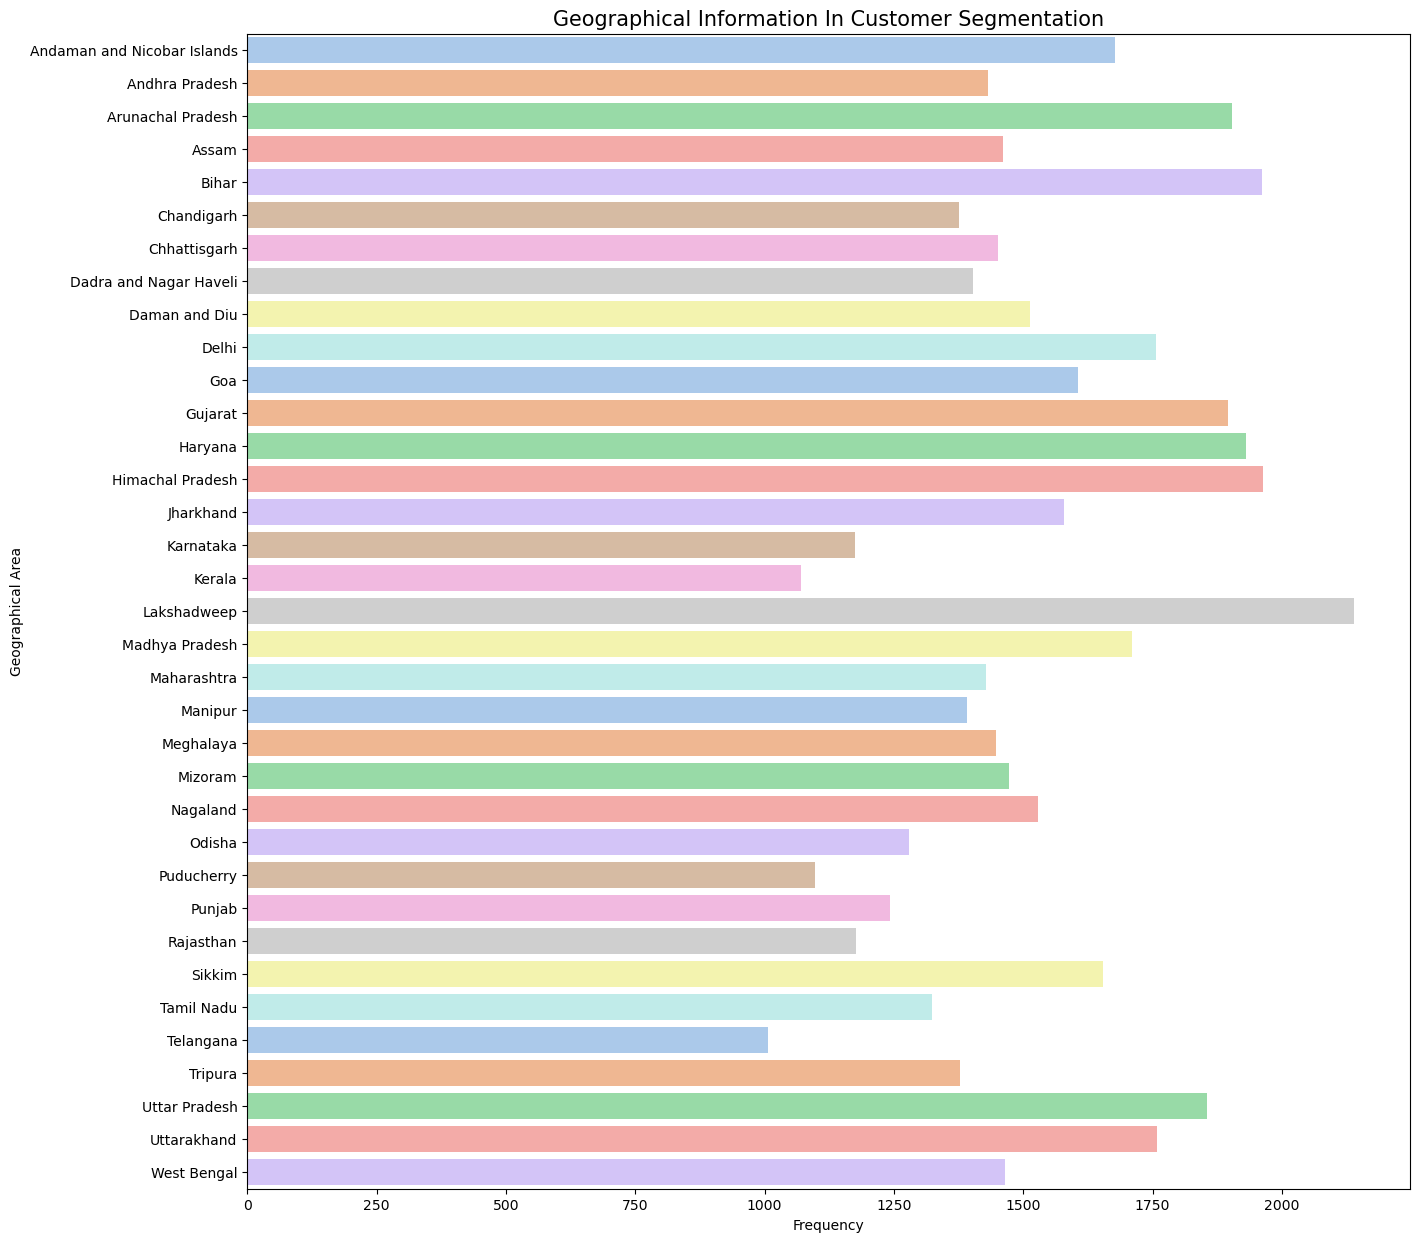

In [24]:
# Plot The Barplot For Geographical Information Among Segmentation

plt.figure(figsize = (15,15))
sns.barplot(y = geo_count["Geographic Information"], x = geo_count["Total_Count"],
            palette = "pastel")
plt.title("Geographical Information In Customer Segmentation", fontsize = 15)
plt.xlabel("Frequency")
plt.ylabel("Geographical Area")
plt.show()

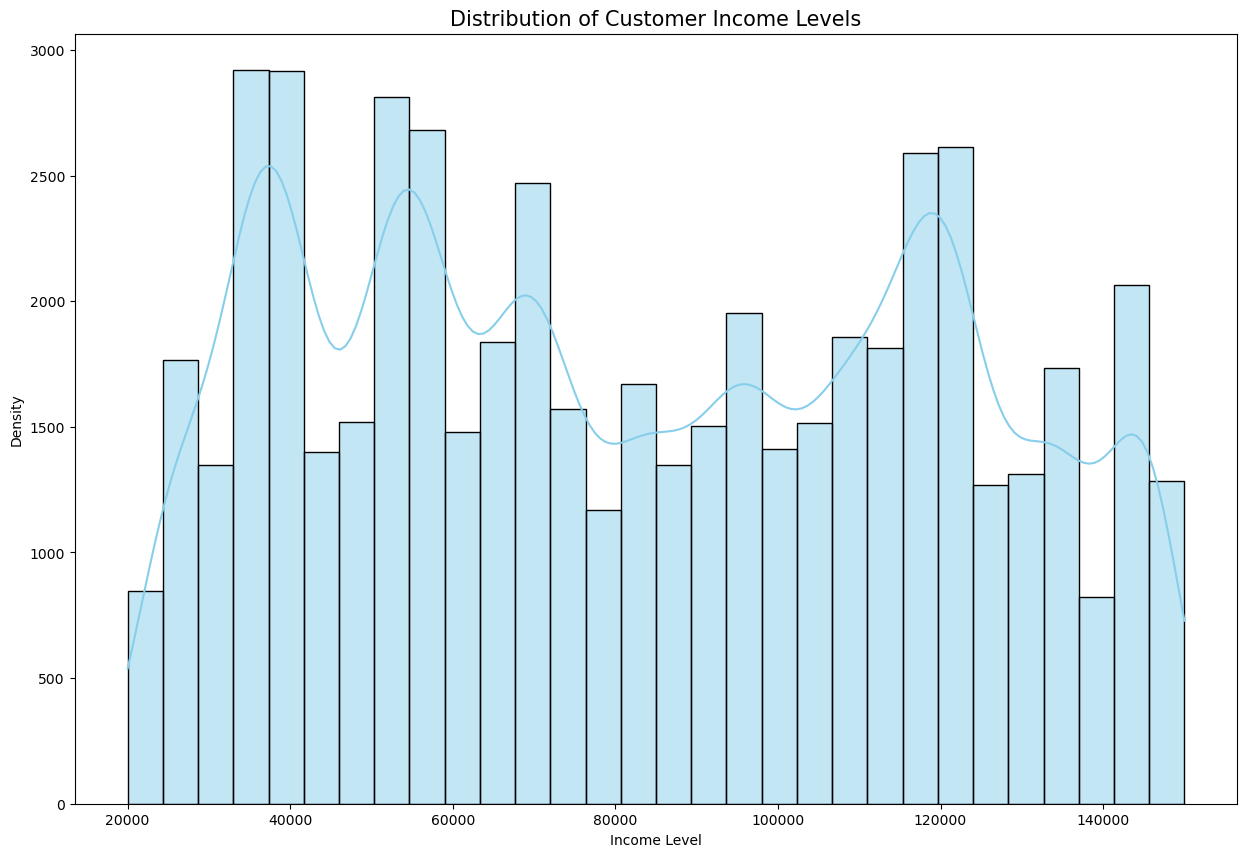

In [25]:
# Checking income level of the customers

plt.figure(figsize = (15,10))
sns.histplot(data["Income Level"], bins = 30, color = "skyblue",kde = True)
plt.title("Distribution of Customer Income Levels",fontsize = 15)
plt.xlabel("Income Level")
plt.ylabel("Density")
plt.show()

In [26]:
# Extracting Marital Status For Customer Segmentation

query = """
SELECT [Marital Status], COUNT([Marital Status]) as Count_of_Marital
FROM customers
GROUP BY [Marital Status]
"""

marital_chk = pd.read_sql(query,conn)
marital_chk

,Marital Status,Count_of_Marital
0,Divorced,13151
1,Married,13219
2,Separated,8861
3,Single,9195
4,Widowed,9077


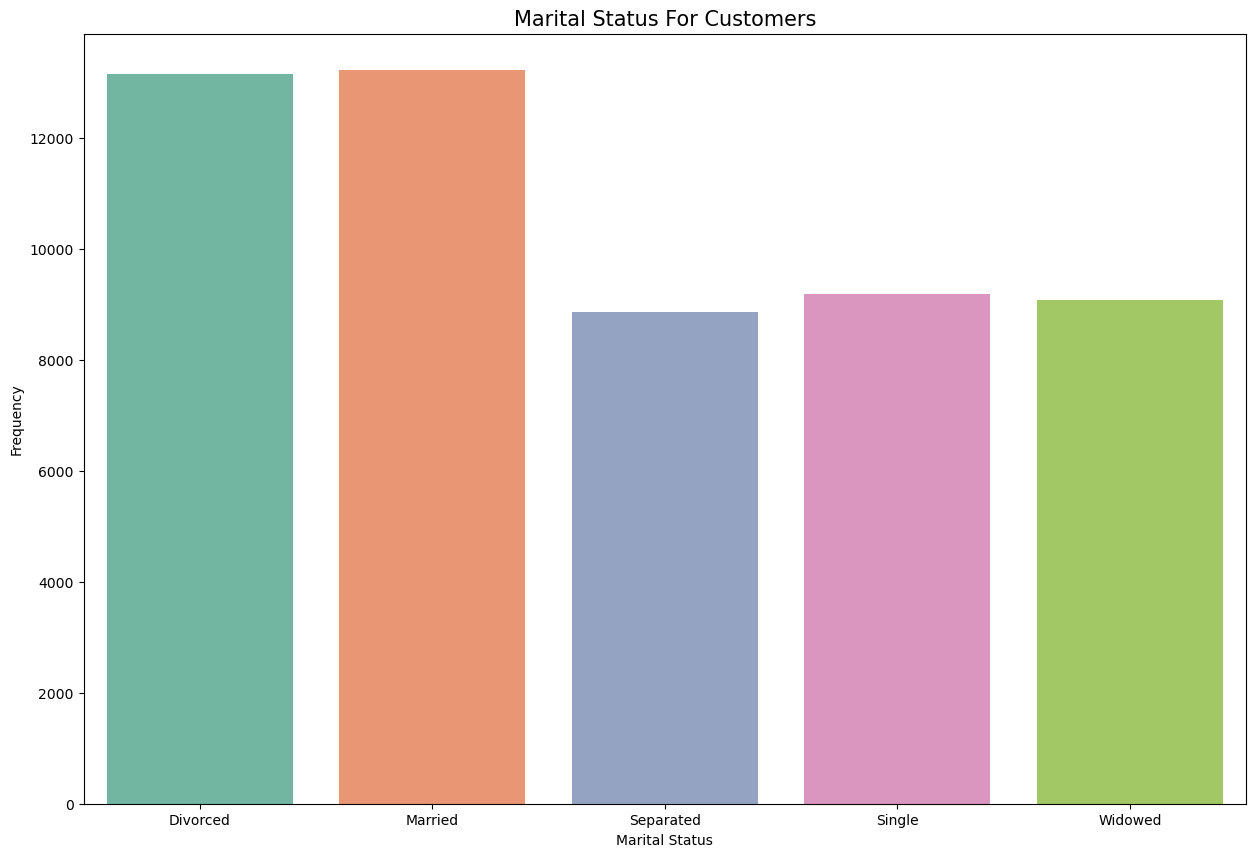

In [27]:
# Plot The Barplot For Marital Status In Customer Segmentation

plt.figure(figsize = (15,10))
sns.barplot(x = marital_chk["Marital Status"], y = marital_chk["Count_of_Marital"],
           palette = "Set2")
plt.title("Marital Status For Customers", fontsize = 15)
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

In [28]:
# Extracting Occupation Information For Customer Segmentation

query = """
SELECT Occupation, COUNT(Occupation) as Count_of_Occupation
FROM customers
GROUP BY Occupation
"""

occu_cnt = pd.read_sql(query,conn)
occu_cnt

,Occupation,Count_of_Occupation
0,Artist,5666
1,Doctor,5573
2,Engineer,5704
3,Entrepreneur,6636
4,Lawyer,5775
5,Manager,5803
6,Nurse,4521
7,Salesperson,7919
8,Teacher,5906


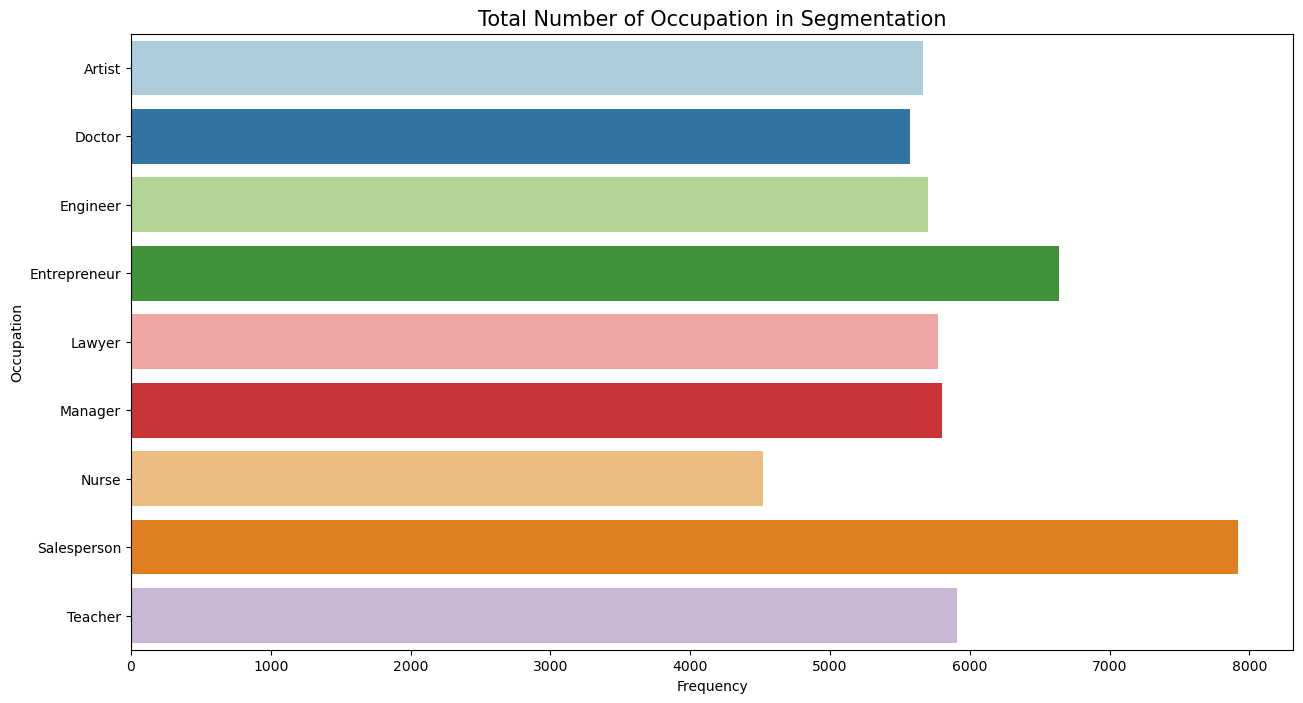

In [29]:
# Plot The Barplot For Occupation Information In Customer Segmentation

plt.figure(figsize = (15,8))
sns.barplot(y = occu_cnt["Occupation"], x = occu_cnt["Count_of_Occupation"],
            palette = "Paired")
plt.title("Total Number of Occupation in Segmentation",fontsize = 15)
plt.xlabel("Frequency")
plt.ylabel("Occupation")
plt.show()

In [30]:
# Extracting Policy Types That Customers Owned

query = """
SELECT [Policy Type], COUNT([Policy Type]) as Total_Policy
FROM customers
GROUP BY [Policy Type]
"""

policy_cnt = pd.read_sql(query,conn)
policy_cnt

,Policy Type,Total_Policy
0,Business,13986
1,Family,12424
2,Group,18255
3,Individual,8838


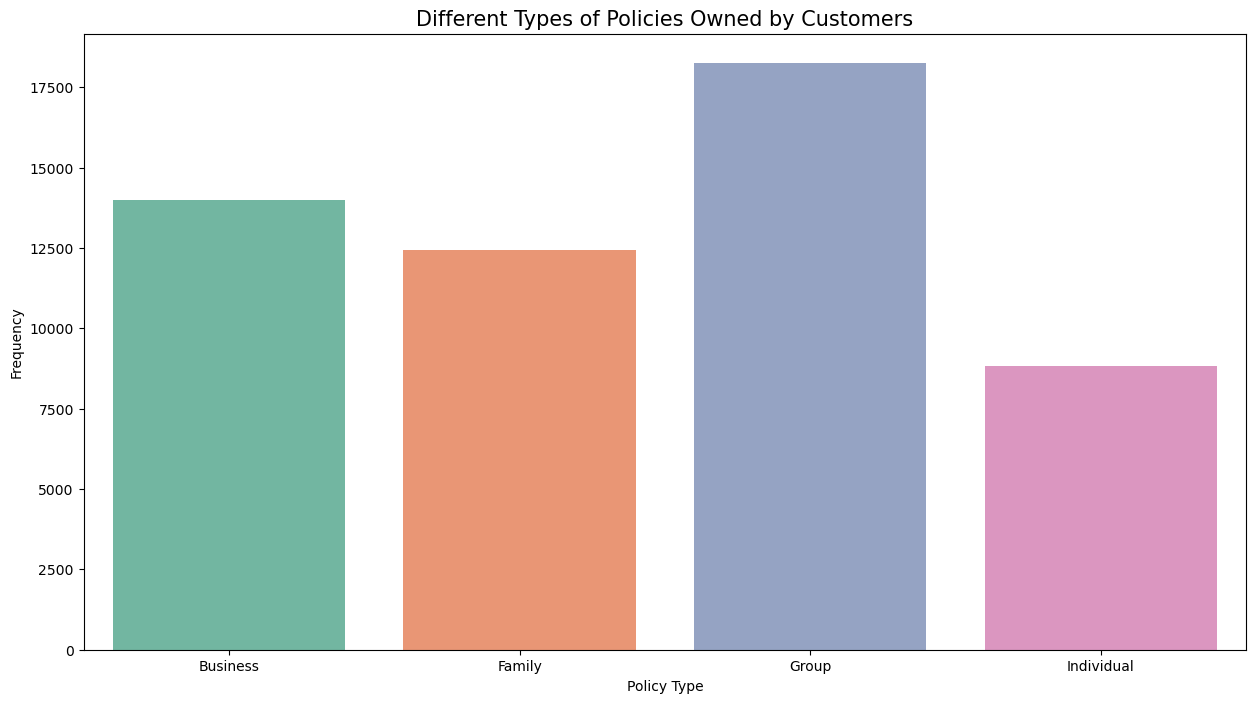

In [31]:
# Plot The Barplot For Different Policy Types In Customer Segmentation

plt.figure(figsize = (15,8))
sns.barplot(x = policy_cnt["Policy Type"], y = policy_cnt["Total_Policy"],
            palette = "Set2")
plt.title("Different Types of Policies Owned by Customers",fontsize = 15)
plt.xlabel("Policy Type")
plt.ylabel("Frequency")
plt.show()

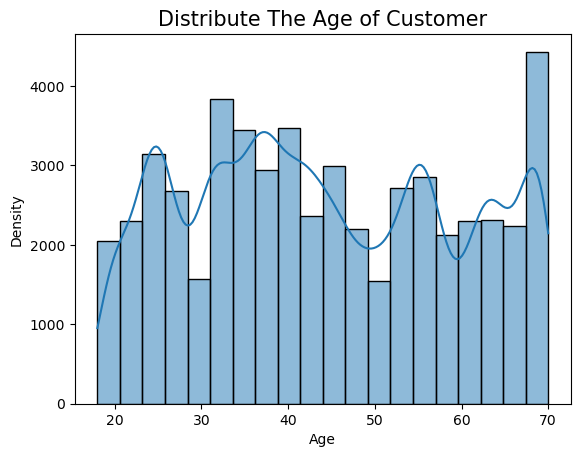

In [32]:
# Distributing Age of customers

plt.title("Distribute The Age of Customer", fontsize = 15)
sns.histplot(data["Age"], bins = 20,kde = True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

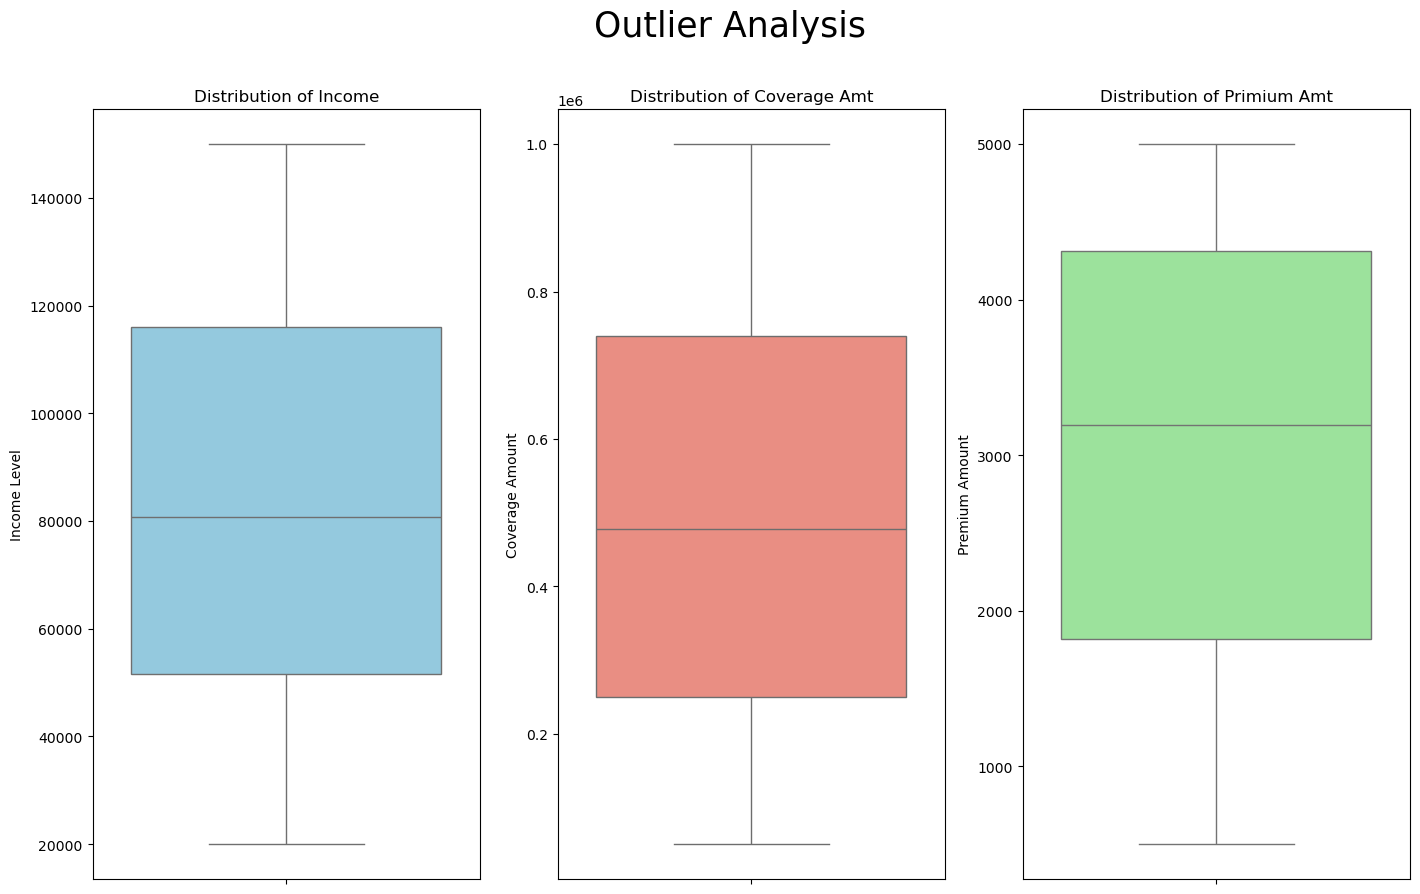

In [33]:
# Checking For An Outliers In Customer Segmentation

fig, axes = plt.subplots(1,3,figsize = (17,10))

sns.boxplot(y = data["Income Level"], ax = axes[0], color = "skyblue")
axes[0].set_title("Distribution of Income")
sns.boxplot(y = data["Coverage Amount"], ax = axes[1], color = "salmon")
axes[1].set_title("Distribution of Coverage Amt")
sns.boxplot(y = data["Premium Amount"], ax = axes[2], color = "lightgreen")
axes[2].set_title("Distribution of Primium Amt")

plt.suptitle("Outlier Analysis",fontsize = 25)
plt.show()

## Feature Engineering

#### Feature Selection

In [36]:
# Seperting Numerical and Categorical Columns

num_col = data.select_dtypes(include = "number")
cat_col = data.select_dtypes(exclude = "number")

In [37]:
# Only Numerical Columns

num_col.columns

Index(['Age', 'Income Level', 'Coverage Amount', 'Premium Amount'], dtype='object')

In [38]:
# Only Categorical Columns

cat_col.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Geographic Information',
       'Occupation', 'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Policy Type', 'Customer Preferences',
       'Preferred Communication Channel', 'Preferred Contact Time',
       'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [39]:
# Selecting Few Features In Numerical Columns

numerical_df = data[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']]
numerical_df.head()

,Age,Income Level,Coverage Amount,Premium Amount
0,23,70541,366603,2749
1,26,54168,780236,1966
2,29,73899,773926,4413
3,20,63381,787815,4342
4,25,38794,366506,1276


In [40]:
# Selecting Few Features In Categorical Columns

categorical_df = data[['Gender', 'Marital Status', 'Education Level', 'Policy Type']]
categorical_df.head()

,Gender,Marital Status,Education Level,Policy Type
0,Female,Married,Associate Degree,Group
1,Male,Widowed,Doctorate,Group
2,Female,Single,Associate Degree,Group
3,Male,Divorced,Bachelor's Degree,Family
4,Female,Separated,Bachelor's Degree,Family


In [41]:
# Handling Categorical Feature Gender

categorical_df["Gender"] = categorical_df["Gender"].str.strip().map({"Female" : 0, "Male" : 1})

In [42]:
# Encoded
categorical_df.head(3)

,Gender,Marital Status,Education Level,Policy Type
0,0,Married,Associate Degree,Group
1,1,Widowed,Doctorate,Group
2,0,Single,Associate Degree,Group


In [43]:
# Hendling Categorical Feature Marital Status

marital_chk = pd.get_dummies(categorical_df["Marital Status"],drop_first = True)
marital_chk = marital_chk.astype(int)
marital_chk.head()

,Married,Separated,Single,Widowed
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,0,0
4,0,1,0,0


In [44]:
# Merging marital_chk Dataframe to categorical_df Dataframe 

categorical_df = pd.concat([categorical_df,marital_chk],axis = 1)

In [45]:
categorical_df.head(3)

,Gender,Marital Status,Education Level,Policy Type,Married,Separated,Single,Widowed
0,0,Married,Associate Degree,Group,1,0,0,0
1,1,Widowed,Doctorate,Group,0,0,0,1
2,0,Single,Associate Degree,Group,0,0,1,0


In [46]:
# Dropping Marital Status column

categorical_df.drop("Marital Status",axis = 1,inplace = True)

In [47]:
categorical_df.head()

,Gender,Education Level,Policy Type,Married,Separated,Single,Widowed
0,0,Associate Degree,Group,1,0,0,0
1,1,Doctorate,Group,0,0,0,1
2,0,Associate Degree,Group,0,0,1,0
3,1,Bachelor's Degree,Family,0,0,0,0
4,0,Bachelor's Degree,Family,0,1,0,0


In [48]:
# Handling Categorical Feature Policy Type

policy_type_chk = pd.get_dummies(categorical_df["Policy Type"],drop_first = True).astype(int)
policy_type_chk.head()

,Family,Group,Individual
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [49]:
# Merging policy_type_chk DataFrame to categorical_df DataFrame

categorical_df = pd.concat([categorical_df,policy_type_chk], axis = 1)
categorical_df.head(3)

,Gender,Education Level,Policy Type,Married,Separated,Single,Widowed,Family,Group,Individual
0,0,Associate Degree,Group,1,0,0,0,0,1,0
1,1,Doctorate,Group,0,0,0,1,0,1,0
2,0,Associate Degree,Group,0,0,1,0,0,1,0


In [50]:
# Dropping Policy Type Column

categorical_df.drop(["Policy Type"],axis = 1, inplace = True)

In [51]:
categorical_df.head()

,Gender,Education Level,Married,Separated,Single,Widowed,Family,Group,Individual
0,0,Associate Degree,1,0,0,0,0,1,0
1,1,Doctorate,0,0,0,1,0,1,0
2,0,Associate Degree,0,0,1,0,0,1,0
3,1,Bachelor's Degree,0,0,0,0,1,0,0
4,0,Bachelor's Degree,0,1,0,0,1,0,0


In [52]:
# Handling Categorical Feature Education Level

categorical_df["Education Level"] = categorical_df["Education Level"].str.strip().map({"High School Diploma": 1, "Associate Degree" : 2, "Bachelor's Degree" : 3, "Master's Degree" : 4, "Doctorate" : 5})
categorical_df.head()

,Gender,Education Level,Married,Separated,Single,Widowed,Family,Group,Individual
0,0,2,1,0,0,0,0,1,0
1,1,5,0,0,0,1,0,1,0
2,0,2,0,0,1,0,0,1,0
3,1,3,0,0,0,0,1,0,0
4,0,3,0,1,0,0,1,0,0


#### Feature Scaling

In [54]:
# Hanlaing Numerical Feature

numerical_df.head()

,Age,Income Level,Coverage Amount,Premium Amount
0,23,70541,366603,2749
1,26,54168,780236,1966
2,29,73899,773926,4413
3,20,63381,787815,4342
4,25,38794,366506,1276


In [55]:
# Stored Features In One place
features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']

# Standardize Numerical Columns 
standardize = StandardScaler()
numerical_df = standardize.fit_transform(numerical_df[features])

In [56]:
# Array to Dataframe

numerical_df = pd.DataFrame(numerical_df,columns = features)
numerical_df.head()

,Age,Income Level,Coverage Amount,Premium Amount
0,-1.401980,-0.333617,-0.469361,-0.213640
1,-1.203033,-0.780348,1.071729,-0.822588
2,-1.004085,-0.241996,1.048219,1.080474
3,-1.600928,-0.528975,1.099966,1.025256
4,-1.269349,-1.199821,-0.469722,-1.359210


In [57]:
# Merging Both Transformed Dataframes ; (Encoded & Standardized)

final_df = pd.concat([categorical_df,numerical_df],axis = 1)
final_df

,Gender,Education Level,Married,Separated,Single,Widowed,Family,Group,Individual,Age,Income Level,Coverage Amount,Premium Amount
0,0,2,1,0,0,0,0,1,0,-1.401980,-0.333617,-0.469361,-0.213640
1,1,5,0,0,0,1,0,1,0,-1.203033,-0.780348,1.071729,-0.822588
2,0,2,0,0,1,0,0,1,0,-1.004085,-0.241996,1.048219,1.080474
3,1,3,0,0,0,0,1,0,0,-1.600928,-0.528975,1.099966,1.025256
4,0,3,0,1,0,0,1,0,0,-1.269349,-1.199821,-0.469722,-1.359210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,0,2,0,0,0,0,1,0,0,-0.606190,1.039043,0.349550,1.073475
53499,1,5,0,0,1,0,0,1,0,1.118023,1.078851,0.540800,-1.352211
53500,1,5,0,0,0,0,0,0,1,-1.269349,-0.914315,0.515926,1.075808
53501,1,5,1,0,0,0,0,0,0,-0.141979,-0.449304,0.885997,1.134136


## Modeling

### Prediction :
#### Linear Regression

In [60]:
## Predicting Premium Amount ##

# Independent Features 
X = final_df.drop("Premium Amount",axis = 1)

# Dependent Features 
y = data["Premium Amount"]

# Splitting Data Into Training And Testing Set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 777)

# Model Execution
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [61]:
main = pd.DataFrame({"Actual": y_test.values,"Predicted" : y_predict.astype(int)})
main

,Actual,Predicted
0,1684,2977
1,1700,3059
2,1910,3008
3,1290,3172
4,1742,3027
...,...,...
10696,4356,3111
10697,1878,2997
10698,2873,3086
10699,1566,3081


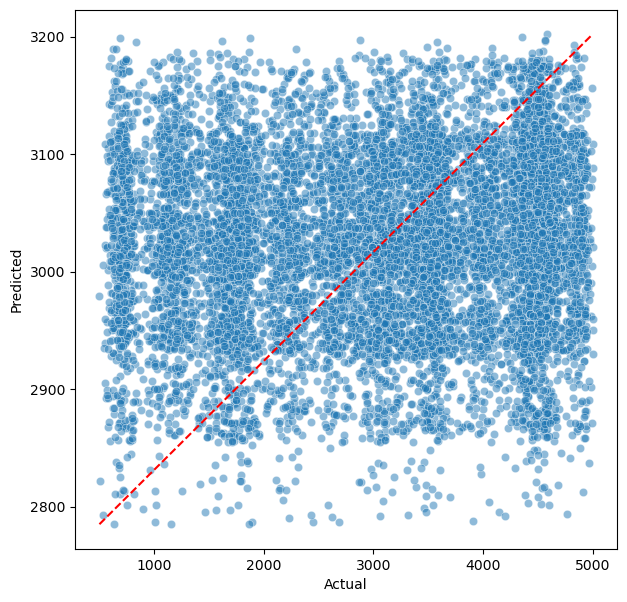

In [62]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = main["Actual"], y = main["Predicted"],alpha = 0.5)
plt.plot([main["Actual"].min(), main["Actual"].max()],
         [main["Predicted"].min(), main["Predicted"].max()],
         color = "red", linestyle = "--")
plt.show()

## Evaluation of Linear Regression

In [64]:
MAE = mean_absolute_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
R2_Score = r2_score(y_test,y_predict)

In [65]:
summary_df = pd.DataFrame({"Liner Regression" : [MAE, MSE, RMSE, R2_Score]},index =["MAE", "MSE", "RMSE", "R2_Score"]).T.astype(float)
summary_df

,MAE,MSE,RMSE,R2_Score
Liner Regression,1116.511786,1.653862e+06,1286.025638,0.003381


- ``Observation:`` I applied linear regression using both numerical and encoded categorical features. The model produced an R² of ~0.0035, which suggests that the linear relationships in the dataset are weak. This result highlights that the premium amount is influenced by non-linear interactions between features, which linear regression cannot effectively capture. 

#### Decision Tree Regressor

In [68]:
# Applying Decision Tree Regressor 

dt = DecisionTreeRegressor(max_depth= 5, random_state=777)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [69]:
main_dt = pd.DataFrame({"Actual": y_test.values,"Predicted" : y_pred_dt.astype(int)})
main_dt

,Actual,Predicted
0,1684,2955
1,1700,3059
2,1910,3033
3,1290,3147
4,1742,3059
...,...,...
10696,4356,3059
10697,1878,2955
10698,2873,3033
10699,1566,3147


## Evaluation of Decision Tree Regressor

In [71]:
mae_dt = mean_absolute_error(y_test,y_pred_dt )
mse_dt = mean_squared_error(y_test,y_pred_dt )
rmse_dt = np.sqrt(mse_dt)
R2_Score_dt = r2_score(y_test,y_pred_dt)

In [72]:
summary_df_dt = pd.DataFrame({"Decision Tree Regressor" : [mae_dt, mse_dt, rmse_dt, R2_Score_dt]},index =["MAE", "MSE", "RMSE", "R2_Score"]).T.astype(float)

summary_final = pd.concat([summary_df,summary_df_dt],axis = 0)
summary_final

,MAE,MSE,RMSE,R2_Score
Liner Regression,1116.511786,1.653862e+06,1286.025638,0.003381
Decision Tree Regressor,1117.123649,1.655375e+06,1286.613628,0.002470


- ``Observation:`` I applied a Decision Tree Regressor using both numerical and encoded categorical features. The model produced an R² of ~0.00247, which suggests that even non-linear splits in the dataset are not capturing the variance in premium amounts effectively. This indicates that the premium amount may be influenced by complex patterns or noise that are not well modeled by this tree. 

## Customer Segmentation 
#### K-Means Clustering

In [75]:
# Finding Elbow 

k_range = range(1,11)
sse = []

for k in k_range:
    k_means = KMeans(n_clusters = k)
    k_means.fit(final_df)
    sse.append(k_means.inertia_)
       

## Evaluation of K-Means Clustering

In [77]:
# Evaluate Sum of Square Error (Inertia)
sse

[401237.71732426167,
 315470.5676515928,
 289736.6947594748,
 274281.18360957067,
 257863.43161670578,
 244784.45673414724,
 235587.12791392428,
 226490.3189951274,
 218484.17461075063,
 210394.31723738223]

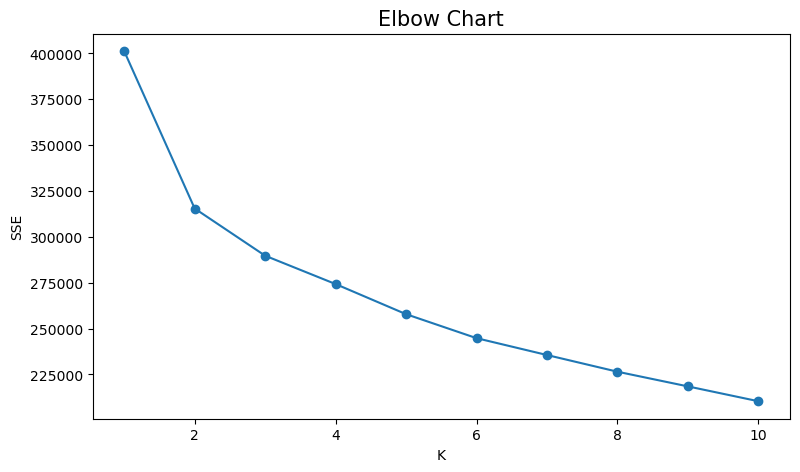

In [78]:
# Plotting Elbow Graph

plt.figure(figsize = (9,5))
plt.plot(k_range,sse,marker = "o")
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Chart", fontsize = 15)
plt.show()

In [79]:
# Suppose optimal clusters is 3
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(final_df)

# Add cluster labels to the original dataframe
data['Cluster'] = clusters
data.head()

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Cluster
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5,1
1,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5,0
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3,1
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3,0
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2,0


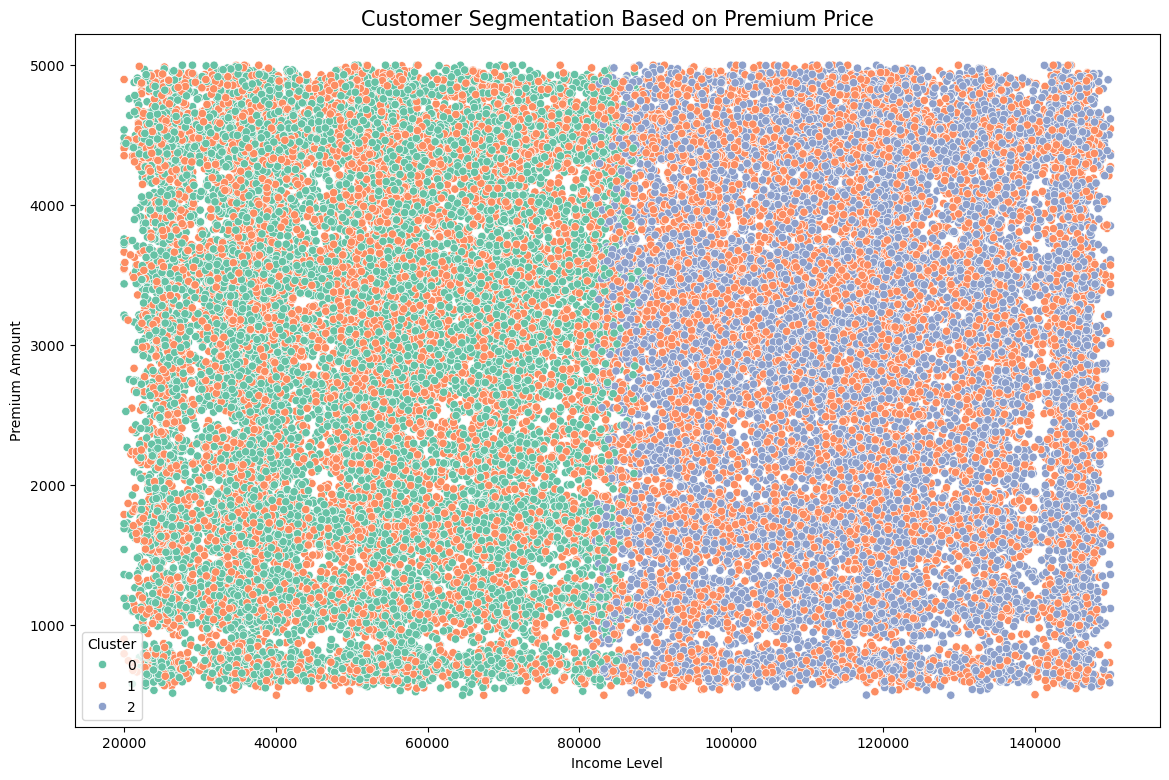

In [80]:
# Plotting Clusters

plt.figure(figsize = (14,9))
sns.scatterplot(data = data,
                x = "Income Level",
                y = "Premium Amount",
                hue = "Cluster",
                palette = "Set2")
plt.title("Customer Segmentation Based on Premium Price", fontsize = 15)
plt.xlabel("Income Level")
plt.ylabel("Premium Amount")
plt.show()

## Insights 

``Insights & Recommendations:``

- Premium amount is not strongly explained by demographics or policy-level features, indicating the need for richer behavioral/financial data to improve prediction models.

- K-Means clustering grouped customers into three main segments, which can be profiled as moderate-income, high-income underinsured, and low-income but high-coverage customers.

`` Marketing actions:``

- Cluster 1 (high income, low premium): Promote premium upgrade plans.

- Cluster 2 (low income, high coverage): Offer loyalty discounts and ensure affordability to retain them.

- Cluster 0 (average customers): Target with cross-selling opportunities.

**Focus future data collection on behavioral and claims-related attributes for stronger predictive modeling.**

# END